In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

Let's load the dataset first. We will use our favourite Titanic Dataset to do the comparison and for ease of understanding

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Let's do some processing on the dataset to see if there are null values and extract some columns from the dataset which we will use in our final models

In [4]:
titanic = titanic.loc[:,('Survived','Pclass','Sex','Age','SibSp','Parch','Fare')]
#Encode the Sex column to values of 0 and 1 for our model
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
5,0,3,1,NaN,0,0,8.4583
6,0,1,1,54.0,0,0,51.8625
7,0,3,1,2.0,3,1,21.0750
8,1,3,0,27.0,0,2,11.1333
9,1,2,0,14.0,1,0,30.0708


In [5]:
#Check for na values
titanic.isna().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
dtype: bool

<b> We see there are NA values in age. Let's investigate <b>

In [6]:
# Read the DataFrame, first using the feature data
titanic[titanic['Age'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,0,3,1,NaN,0,0,8.4583
17,1,2,1,NaN,0,0,13.0000
19,1,3,0,NaN,0,0,7.2250
26,0,3,1,NaN,0,0,7.2250
28,1,3,0,NaN,0,0,7.8792
...,...,...,...,...,...,...,...
859,0,3,1,NaN,0,0,7.2292
863,0,3,0,NaN,8,2,69.5500
868,0,3,1,NaN,0,0,9.5000
878,0,3,1,NaN,0,0,7.8958


For our use case, we'll be dropping off the na values

In [7]:
titanic.dropna(inplace=True)
# We no longer have any na values
titanic[titanic['Age'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare


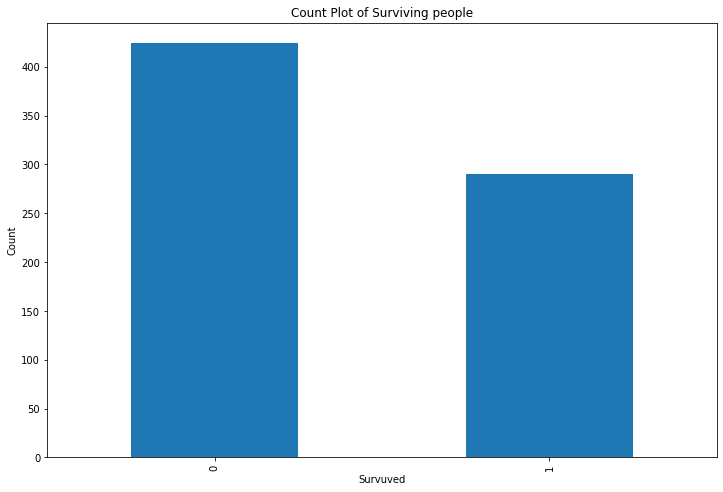

In [8]:
plt.figure(figsize=(12,8))
titanic['Survived'].value_counts().plot(kind="bar",title='Count Plot of Surviving people',ylabel='Count',xlabel='Survuved') 
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
x = titanic.drop(columns='Survived')
y = titanic['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=1) #stratify=y ensures that the proportion of species in any sample remains the same
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(499, 6)
(215, 6)
(499,)
(215,)


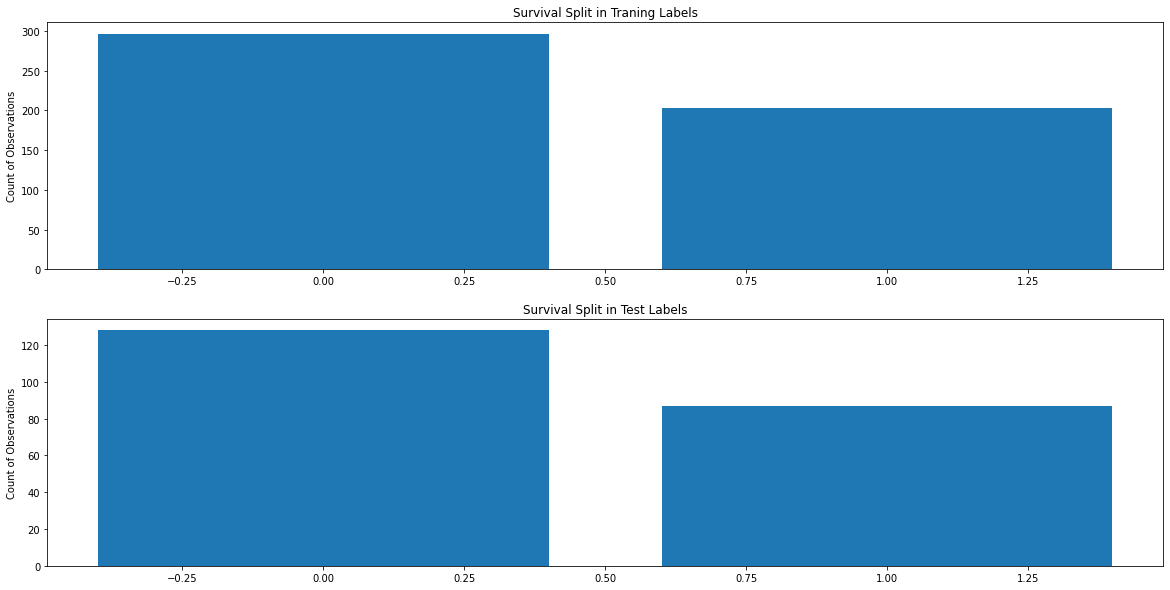

In [12]:

fig,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].bar(y_train.value_counts().index,y_train.value_counts())
ax[0].set_title('Survival Split in Traning Labels')
ax[0].set_ylabel('Count of Observations')


ax[1].bar(y_test.value_counts().index,y_test.value_counts())
ax[1].set_title('Survival Split in Test Labels')
ax[1].set_ylabel('Count of Observations')

plt.show()


## Decision Tree Baseline Model

Fitting this dataset on the basic decision tree model

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier(random_state=1)
dc_model.fit(x_train,y_train)
y_train_pred_dc = dc_model.predict(x_train)
y_test_pred_dc = dc_model.predict(x_test)

test_accuracy_dc = accuracy_score(y_test_pred_dc,y_test)
train_accuracy_dc = accuracy_score(y_train_pred_dc,y_train)
print("Train Accuracy Score for Baseline Model : {}".format(train_accuracy_dc))
print("Test Accuracy Score for Baseline Model : {}".format(test_accuracy_dc))

Train Accuracy Score for Baseline Model : 0.9879759519038076
Test Accuracy Score for Baseline Model : 0.7069767441860465


In [14]:
print("Test Confusion Matrix for Baseline Model \n {}".format(confusion_matrix(y_test_pred_dc,y_test)))
print("\n Train Confusion Matrix for Baseline Model \n {}".format(confusion_matrix(y_train_pred_dc,y_train)))

Test Confusion Matrix for Baseline Model 
 [[97 32]
 [31 55]]

 Train Confusion Matrix for Baseline Model 
 [[296   6]
 [  0 197]]


<b> It's clearly visible that the model is overfitting due to the stark difference in the train and test accuracy difference and the number of false positive and negatives are also higher in the test dataset <b>


Let's try to visualise this tree as well. As we clearly see in the figure below there are a lot of rules associated with this model and it becomes difficult to handle new test data

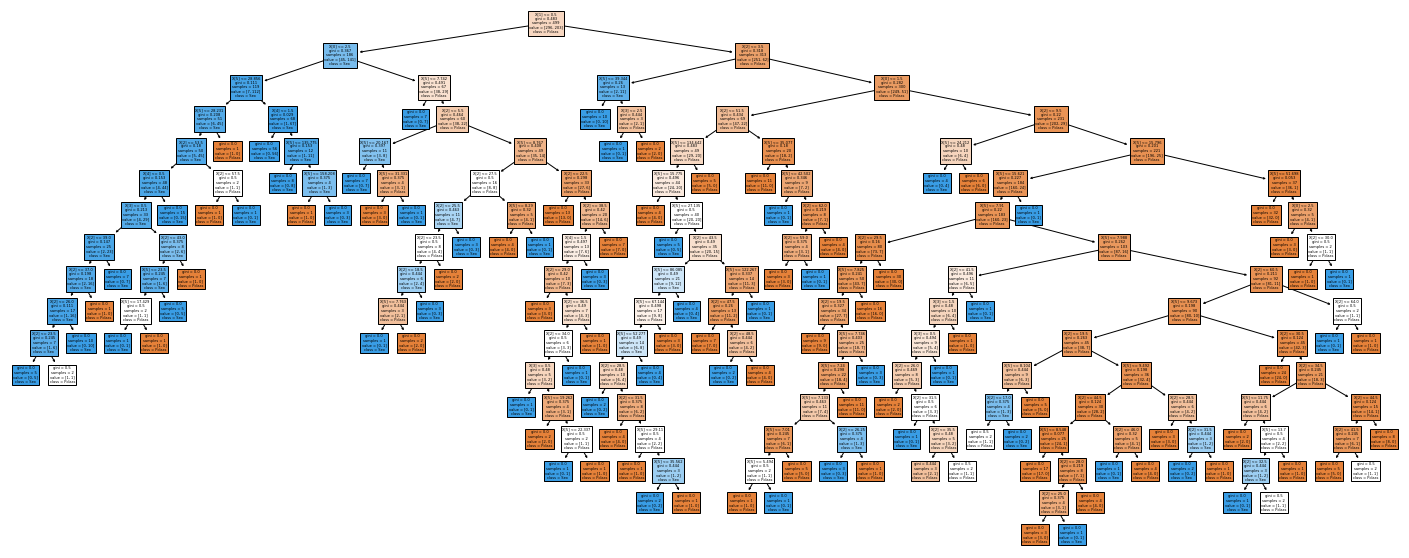

In [15]:
from sklearn import tree
plt.figure(figsize=(25,10))
import graphviz
tree.plot_tree(dc_model, 
                   feature_names=None,  
                   class_names=x.columns.values,
                   filled=True)
plt.show()

## Pre-pruning Decision Trees

We will now look at how we can better the accuracy of the decision tree by pre pruning. This involves training  the dataset with varying features of parameters of the decision tree till we find the best one out of the lot

In [16]:
from sklearn.model_selection import GridSearchCV
grid = {'criterion': ['gini'],
        'max_depth': range(1,30),
        'min_samples_split' : range(1,10),
        'min_samples_leaf' : range(1,5)
}

dc_prepruned = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(dc_prepruned,param_grid=grid,cv=10,verbose=1,n_jobs=-1)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 1044 candidates, totalling 10440 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(1, 30),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [17]:
print("Best Parameters : {} ".format(grid_search.best_params_))
dc_pre_best = grid_search.best_estimator_

Best Parameters : {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 9} 


In [18]:
y_pred_prepruned = dc_pre_best.predict(x_test)
y_train_prepruned = dc_pre_best.predict(x_train)
y_test_prepruned = dc_pre_best.predict(x_test)

train_accuracy_prepruned = accuracy_score(y_train_prepruned,y_train)
test_accuracy_prepruned = accuracy_score(y_test_prepruned,y_test)

print("Train Accuracy Score for Pre Pruned Decision Tree : {}".format(train_accuracy_prepruned))
print("Test Accuracy Score for Pre Pruned Decision Tree: {}".format(test_accuracy_prepruned))

Train Accuracy Score for Pre Pruned Decision Tree : 0.875751503006012
Test Accuracy Score for Pre Pruned Decision Tree: 0.7627906976744186


In [19]:
print("Train Confusion Matrix for Pre Pruned Decision Tree \n {}".format(confusion_matrix(y_train_prepruned,y_train)))
print("\n Test Confusion Matrix for Pre Pruned Decision Tree \n {}".format(confusion_matrix(y_test_prepruned,y_test)))

Train Confusion Matrix for Pre Pruned Decision Tree 
 [[292  58]
 [  4 145]]

 Test Confusion Matrix for Pre Pruned Decision Tree 
 [[121  44]
 [  7  43]]


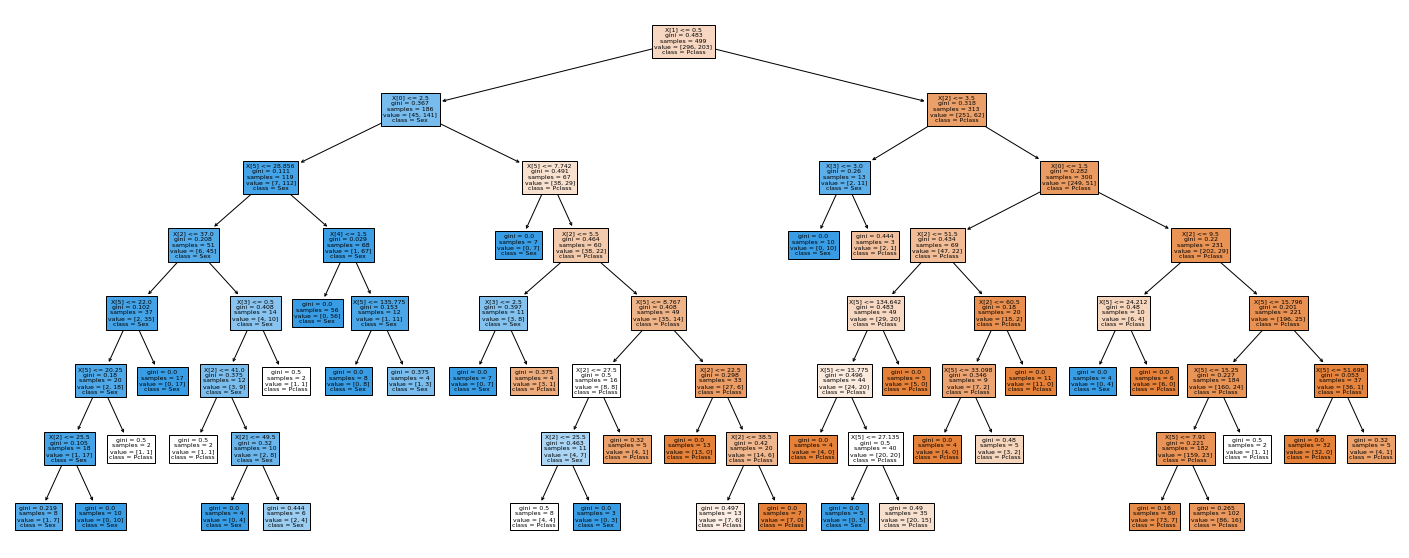

In [20]:
plt.figure(figsize=(25,10))
tree.plot_tree(dc_pre_best, 
                   feature_names=None,  
                   class_names=x.columns.values,
                   filled=True)
plt.show()

## Post-pruning Decision Trees

Let's look at the other method of pruning decision trees. In post-pruning, we build the whole tree and then prune it back to make the decision tree. Here we prune the branches of decision tree using cost_complexity_pruning technique. ccp_alpha, the cost complexity parameter, parameterizes this pruning technique. Think of it as a regularization parameter which adds a  penalty on everytime you have more leaves in the tree. Greater values of ccp_alpha increase the number of nodes pruned.

In [21]:
post_dc_model = DecisionTreeClassifier(random_state=1)
post_path = post_dc_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas, impurities = post_path.ccp_alphas, post_path.impurities #Impurity is the proportion of misclassifications at the leaf node

In [22]:
print("Alpha Values \n{}".format(ccp_alphas))
print("\n Impurtities \n{}".format(impurities))

Alpha Values 
[0.00000000e+00 1.33600534e-04 6.68002672e-04 8.68403474e-04
 8.84121184e-04 1.00200401e-03 1.20240481e-03 1.20240481e-03
 1.28256513e-03 1.29989709e-03 1.31171434e-03 1.31635821e-03
 1.37417693e-03 1.54594904e-03 1.56054406e-03 1.67000668e-03
 1.71772116e-03 1.75350701e-03 1.81696727e-03 1.85370741e-03
 2.00400802e-03 2.00400802e-03 2.15752416e-03 2.21030296e-03
 2.55055566e-03 2.67201069e-03 2.88933304e-03 2.91492075e-03
 3.00601202e-03 3.14915545e-03 3.60721443e-03 3.66447180e-03
 3.75296047e-03 4.11078567e-03 4.29430289e-03 4.36246643e-03
 4.37238113e-03 5.40590201e-03 5.73875023e-03 6.38749831e-03
 7.02010081e-03 7.95665489e-03 1.00778672e-02 2.28318323e-02
 4.43964198e-02 1.46633590e-01]

 Impurtities 
[0.01269205 0.01282565 0.01349365 0.01523046 0.0169987  0.01800071
 0.02281033 0.02761995 0.03146764 0.03536733 0.03667905 0.04062812
 0.04749901 0.04904496 0.05996876 0.06330878 0.06674422 0.07025123
 0.07388517 0.07759258 0.08360461 0.08560861 0.10071128 0.10513189


<b> The last alpha value corresponds to the root node which is redundant so we do all of our calculations removing that<b>

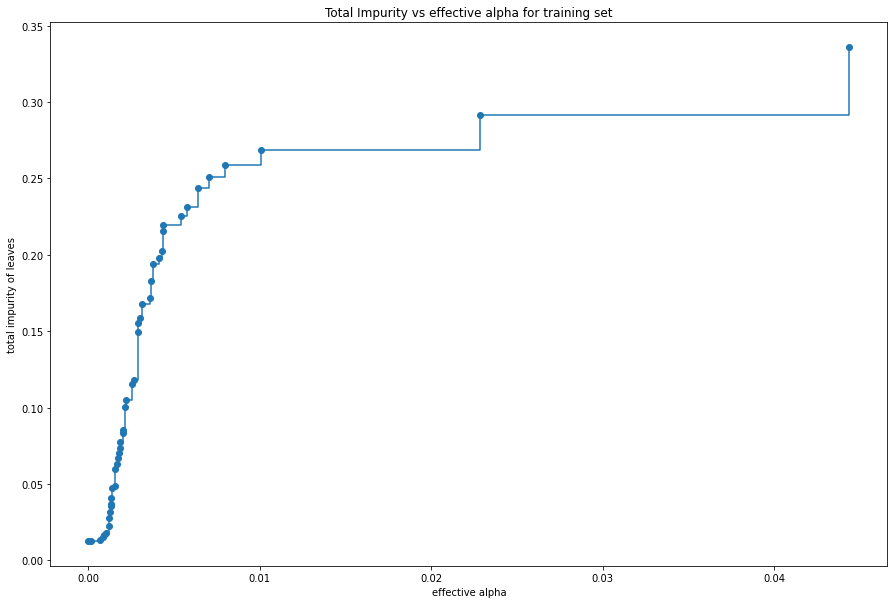

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

 As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves because the tree is now getting rid of it's overfitting feature.
Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree.

In [24]:
clfs = []
ccp_alpha = ccp_alphas[:-1]
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

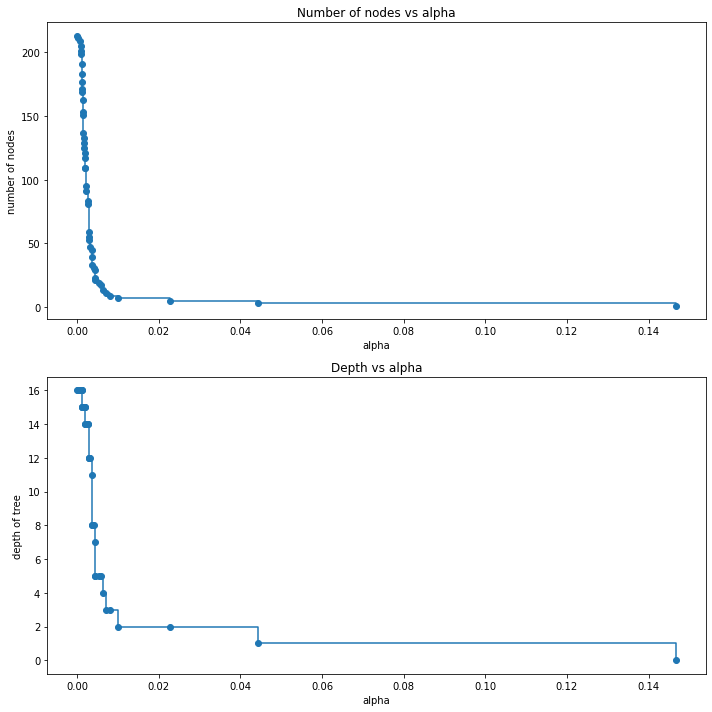

In [25]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,10))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Number of nodes and tree depth decreases as alpha increases because we are pruning the decision trees

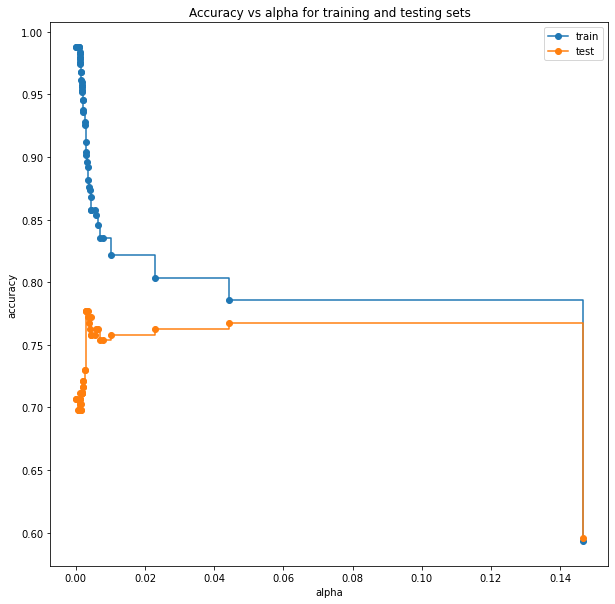

In [26]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

The training and testing accuracy seems to be somewhat closer when the alpha value is greater than 0.005. We will use that to see the accuracy score for the decision tree model

In [27]:
dc_post_best = DecisionTreeClassifier(random_state=1,ccp_alpha = 0.05)
dc_post_best.fit(x_train,y_train)
y_train_postpruned = dc_post_best.predict(x_train)
y_test_postpruned = dc_post_best.predict(x_test)

train_accuracy_postpruned = accuracy_score(y_train_postpruned,y_train)
test_accuracy_postpruned = accuracy_score(y_test_postpruned,y_test)

print("Train Accuracy Score for Post Pruned Tree : {}".format(train_accuracy_postpruned))
print("Test Accuracy Score for Post Pruned Tree : {}".format(test_accuracy_postpruned))

Train Accuracy Score for Post Pruned Tree : 0.7855711422845691
Test Accuracy Score for Post Pruned Tree : 0.7674418604651163


In [28]:
print("Train Confusion Matrix for Post Pruned Tree \n {}".format(confusion_matrix(y_train_postpruned,y_train)))
print("\n Test Confusion Matrix for Post Pruned Tree \n {}".format(confusion_matrix(y_test_postpruned,y_test)))

Train Confusion Matrix for Post Pruned Tree 
 [[251  62]
 [ 45 141]]

 Test Confusion Matrix for Post Pruned Tree 
 [[109  31]
 [ 19  56]]


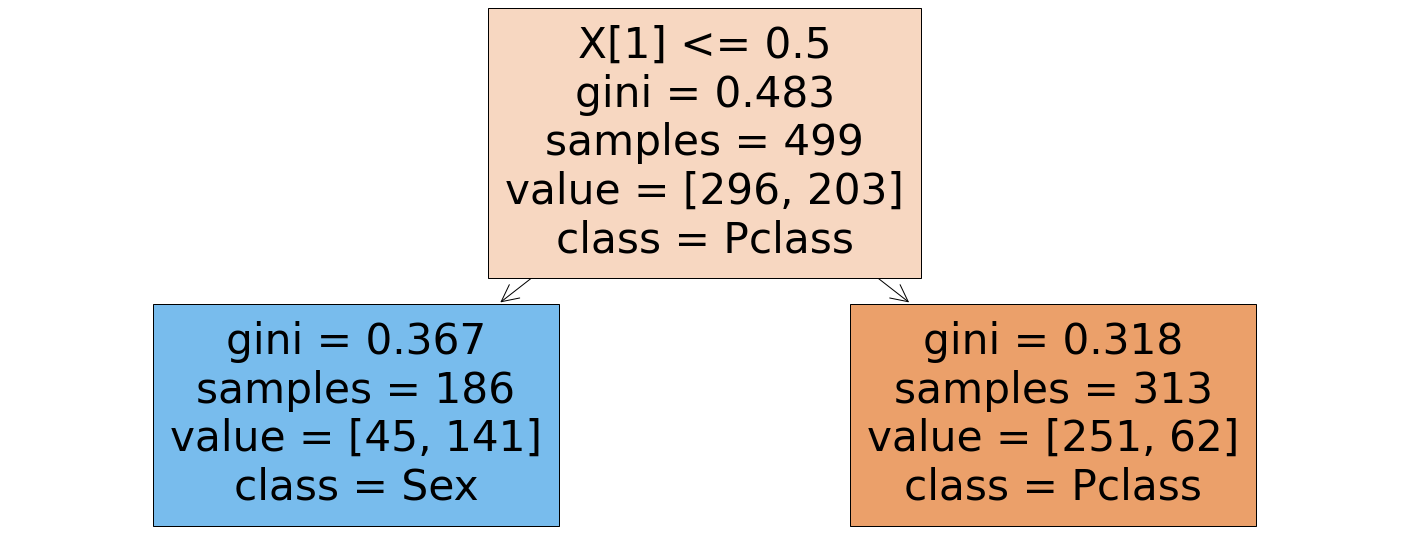

In [29]:
plt.figure(figsize=(25,10))
tree.plot_tree(dc_post_best, 
                   feature_names=None,  
                   class_names=x.columns.values,
                   filled=True)
plt.show()

The whole tree has been reduced to just 2 leaf nodes which seems pretty incredible from the baseline tree model

In [30]:
accuracyDf = pd.DataFrame({'Train' : [train_accuracy_dc,train_accuracy_prepruned,train_accuracy_postpruned],
              'Test':[test_accuracy_dc,test_accuracy_prepruned,test_accuracy_postpruned]},index=['Baseline Model','Pre Pruned','Post Pruned'])


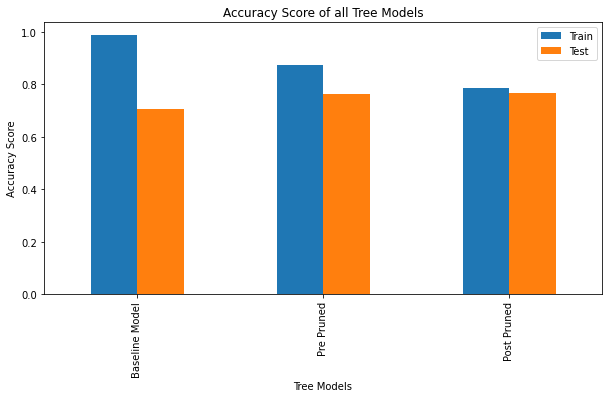

In [31]:
accuracyDf.plot(kind="bar",xlabel='Tree Models',ylabel='Accuracy Score',title='Accuracy Score of all Tree Models',figsize=(10,5))
plt.show()

As seen from the bar graph above, overfitting seems to be less in the post pruned model